In [1]:
import numpy as np
import pandas as pd 

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error

Birinci ve ikinci datasetlerinin tanımlanması ve genel bakışı.
İki veristesini birleştirip cinsiyet, yaş, ağırlık, boy, süre, kalp atım hızı, vücut sıcaklığı parametrelerinden yola çıkarak kalori tahmini yapmak için kullanıyoruz.

In [35]:
calories = pd.read_csv('calories (2).csv')
exercise = pd.read_csv('exercise.csv')

Calories per User_ID( kişi başına kalori)

In [36]:
calories

User_ID  Calories
0      14733363     231.0
1      14861698      66.0
2      11179863      26.0
3      16180408      71.0
4      17771927      35.0
...         ...       ...
14995  15644082      45.0
14996  17212577      23.0
14997  17271188      75.0
14998  18643037      11.0
14999  11751526      98.0

[15000 rows x 2 columns]

Gender, age, weight, height and other physical data per user id
cinsiyet, yaş, ağırlık, boy ve diğer özellikler(süre, kalp atım hızı, vücut sıcaklığı)

In [37]:
exercise

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0      14733363    male   68   190.0    94.0      29.0       105.0       40.8
1      14861698  female   20   166.0    60.0      14.0        94.0       40.3
2      11179863    male   69   179.0    79.0       5.0        88.0       38.7
3      16180408  female   34   179.0    71.0      13.0       100.0       40.5
4      17771927  female   27   154.0    58.0      10.0        81.0       39.8
...         ...     ...  ...     ...     ...       ...         ...        ...
14995  15644082  female   20   193.0    86.0      11.0        92.0       40.4
14996  17212577  female   27   165.0    65.0       6.0        85.0       39.2
14997  17271188  female   43   159.0    58.0      16.0        90.0       40.1
14998  18643037    male   78   193.0    97.0       2.0        84.0       38.3
14999  11751526    male   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 8 columns]

İki dataseti birleştirildi.

In [38]:
df = pd.merge(exercise, calories, on = 'User_ID')
df.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.1+ MB


In [40]:
df.describe()

User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories  
count  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533  
std        9.583328      0.779230     62.456978  
min       67.000000     37.100000      1.000000  
25%       88.000000     39.600000     35.000000  
50%       96.000000     40.200000     79.000000  
75%      103.000000     40.600000    138.000000  
max      128.000000     41.500000    314.000000

Her sütundaki boş satırları bul

In [41]:
df.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Gender(cinsiyet) F-M ve count grafiği çizildi

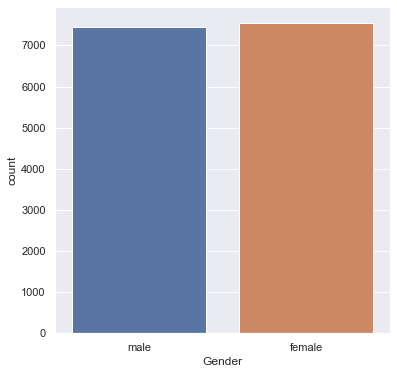

In [42]:
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x=df.Gender)
plt.show()

Density-Height grafiği

C:\Users\hasan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


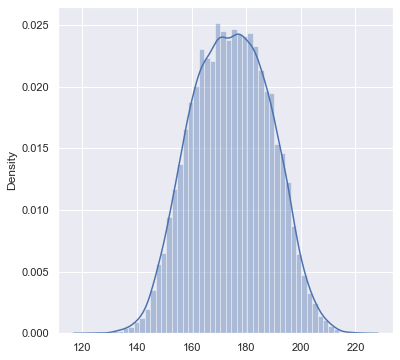

In [43]:
plt.figure(figsize=(6,6))
sns.distplot(x=df.Height)
plt.show()

Density-Weight grafiği

C:\Users\hasan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


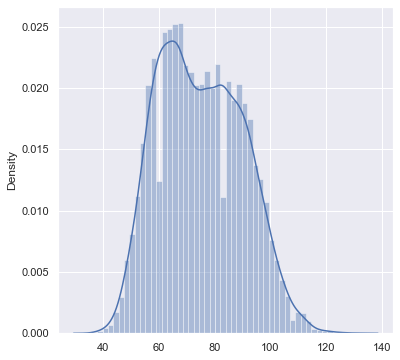

In [44]:
plt.figure(figsize=(6,6))
sns.distplot(x=df.Weight)
plt.show()

Density-Age grafiği

C:\Users\hasan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


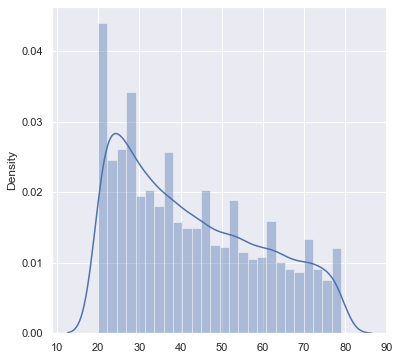

In [45]:
plt.figure(figsize=(6,6))
sns.distplot(x=df.Age)
plt.show()

Duration-Calories(Zaman-Kalori) grafiği çizildi

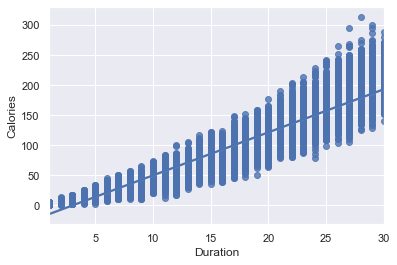

In [46]:
sns.regplot(x='Duration',y='Calories',data=df)
plt.show()

Density-Height grafiği

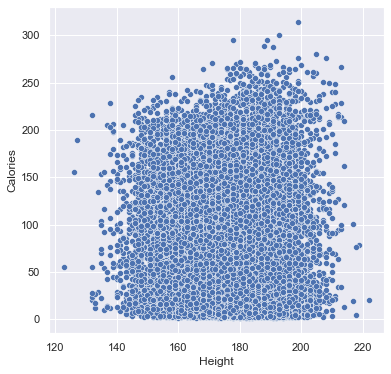

In [47]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=df.Height,y=df.Calories)
plt.show()

Korelasyon 

In [48]:
df.corr()

User_ID       Age    Height    Weight  Duration  Heart_Rate  \
User_ID     1.000000 -0.001827 -0.013520 -0.011603 -0.002751   -0.000457   
Age        -0.001827  1.000000  0.009554  0.090094  0.013247    0.010482   
Height     -0.013520  0.009554  1.000000  0.958451 -0.004625    0.000528   
Weight     -0.011603  0.090094  0.958451  1.000000 -0.001884    0.004311   
Duration   -0.002751  0.013247 -0.004625 -0.001884  1.000000    0.852869   
Heart_Rate -0.000457  0.010482  0.000528  0.004311  0.852869    1.000000   
Body_Temp   0.000923  0.013175  0.001200  0.004095  0.903167    0.771529   
Calories   -0.001661  0.154395  0.017537  0.035481  0.955421    0.897882   

            Body_Temp  Calories  
User_ID      0.000923 -0.001661  
Age          0.013175  0.154395  
Height       0.001200  0.017537  
Weight       0.004095  0.035481  
Duration     0.903167  0.955421  
Heart_Rate   0.771529  0.897882  
Body_Temp    1.000000  0.824558  
Calories     0.824558  1.000000

Korelasyon(iki verinin birbiri ile ilişki) grafiği çizildi.

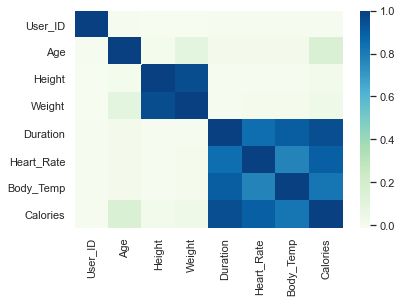

In [49]:
corr = df.corr()
sns.heatmap(df.corr(), cmap='GnBu')
plt.show()

In [50]:
X = df.drop(['User_ID','Gender','Age','Height','Weight','Heart_Rate','Body_Temp','Calories'],axis=1,index=None)
y = df.drop(['User_ID','Gender','Age','Height','Weight','Heart_Rate','Body_Temp','Duration'],axis=1)

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [52]:
X_train.shape,X_test.shape

((12000, 1), (3000, 1))

Karar Ağacı(DT) regresyonu tanımlandı

In [53]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
pred = dt.predict(X_train)
score = metrics.r2_score(y_train,pred)
score

0.9282248617533129

Regresyon değerlendirme yöntemleri tanımlandı.

--R2 kalıntı kareleri toplamının ytrue-yortalama kareleri toplamına bölümü sonucu elde edilen değerin 1 den çıkarılması ile bulunur. en yüksek skor 1. 1 ne kadar yakınsa model o kadar iyi fit edilmiştir. Genelde 0-1 arası değer verir. Ancak çok uç veriler kullanıldığında veya model uygun olmadığında negatif sonuç verebilir.Yani r2 skoru 1'e yakınsa sonuç daha iyidir.
--RMSE tahmin hatalarının standart sapmasıdır. RMSE değerinin sıfır olması modelin hiç hata yapmadığı anlamına gelir.
--MAPE Mutlak hatalar hesaplandıktan sonra ytrue ya göre yüzdeler alınarak bulunur.
--MAE, yönlerini dikkate almadan bir dizi tahmindeki hataların ortalama büyüklüğünü ölçen, tüm tekil hataların ortalamada eşit olarak ağırlıklandırıldığı doğrusal bir skordur.

In [58]:
tree_reg=DecisionTreeRegressor()
tree_reg.fit(X,y)
tree_reg_pred=tree_reg.predict(X)
print(" r2:",r2_score(y,tree_reg_pred))
print(" mae:",mean_absolute_error(y,tree_reg_pred))
print(" mape:",mean_absolute_percentage_error(y,tree_reg_pred))
print(" mse:",mean_squared_error(y,tree_reg_pred))
print(" rmse:",(mean_squared_error(y,tree_reg_pred))**0.5)

 r2: 0.9290124248212817
 mae: 11.35186067248281
 mape: 0.16606239135587383
 mse: 276.8951322029044
 rmse: 16.64016623122811


K-fold cross validation.
Yapılan bir istatistiksel analizin bağımsız bir veri setinde nasıl bir sonuç elde edeceğini tahmin eden bir model doğrulama tekniğidir.

In [62]:
import numpy as np
from sklearn.model_selection import cross_val_score
K=np.mean(cross_val_score(tree_reg, X_train, y_train, cv=10))
print (K)

0.9277645949838191
